In [2]:
import pandas as pd
import import_ipynb
import Monotone_Chain as MC

importing Jupyter notebook from Monotone_Chain.ipynb


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
columns = ['Number of point','X','Y']
df = pd.read_csv("DataCluster.csv")
df = df.drop(columns[0], axis=1)
df.values

array([[  9.03,   8.15],
       [  1.74,   2.99],
       [  9.47,   6.68],
       ...,
       [-26.83, -23.76],
       [-22.73, -27.32],
       [-24.91, -24.68]])

Size of point:  1799
(759.1957606978308+0j)
0.016954421997070312
Size of hull:  13
1799


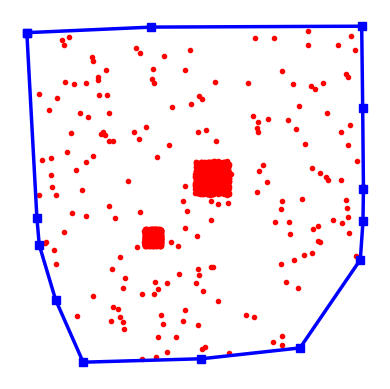

In [5]:
Point_full = MC.Points(df,0)
MC.plot_points(Point_full)
MC.plot_convex_hull(MC.convex_hull(Point_full))
print(len(Point_full))


Size of point:  1799
(159.63991933290228+0j)
0.011967658996582031
Size of hull:  14
1539


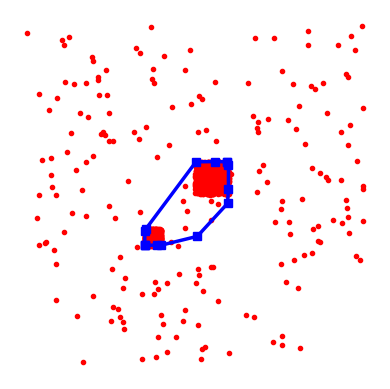

In [6]:
Point_80 = MC.Points(df,0.05)
MC.plot_points(Point_full)
Hull_80 = MC.convex_hull(Point_80)
MC.plot_convex_hull(Hull_80)
print(len(Point_80))

In [7]:
import time

Size of point:  1539
(159.63991933290228+0j)
0.015030622482299805
Size of hull:  14


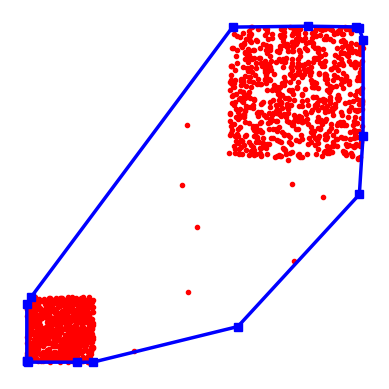

In [8]:
MC.plot_points(Point_80)
Hull_80 = MC.convex_hull(Point_80)
MC.plot_convex_hull(Hull_80)

In [9]:
newdata = ([])
for (i,(x,y)) in enumerate(Point_80):
    newdata.append([x,y])

In [10]:
clustering = DBSCAN(eps=3, min_samples=10).fit(newdata)
labels = clustering.labels_
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [11]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_clusters_)
print(n_noise_)

2
10


(67.37757353333777+0j)
0.00598454475402832
Size of hull:  12
Number of points in hull 1 : 778
-------------------------------
(39.212236028262275+0j)
0.006017923355102539
Size of hull:  14
Number of points in hull 2 : 751
-------------------------------
Size of point:  1539


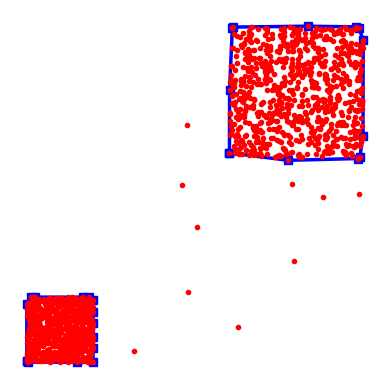

In [12]:
CountMCtrix = []
Set_of_hull = ([])
Count_of_hull = []
for i in set(labels):
    if i==-1: break
    subpoint = set()
    for (j,(x,y)) in enumerate(Point_80):
        if labels[j]==i:
            subpoint.add(MC.Point(x,y))
    Count_of_hull.append(len(subpoint))
    subhull = MC.convex_hull(subpoint)
    Set_of_hull.append(subhull)
    MC.plot_convex_hull(subhull)
    print("Number of points in hull",i+1,':',len(subpoint))
    print('-------------------------------')
MC.plot_points(Point_80)

In [13]:
import random

In [14]:
Point_rand = set()
for i in range(1000):
    Point_rand.add(MC.Point(random.randint(-1000,1000),random.randint(-1000,1000)))
for i in range (50):
    Point_rand.add(MC.Point(random.randint(-100000,100000),random.randint(-100000,100000)))

Size of point:  1050


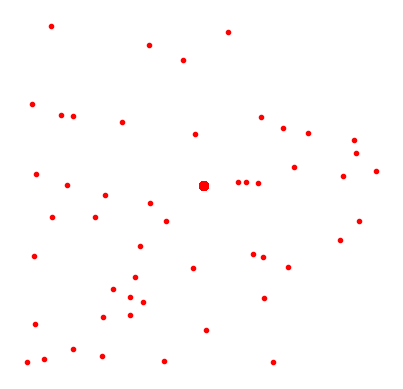

In [15]:
MC.plot_points(Point_rand)

In [16]:
hull_rand = MC.convex_hull(Point_rand)

(698353.347709294+0j)
0.003972291946411133


In [17]:
rand_data = ([])
for (i,(x,y)) in enumerate(Point_rand):
    rand_data.append([x,y])

In [18]:
clustering = DBSCAN(eps=1000, min_samples=3).fit(rand_data)
rand_labels = clustering.labels_
rand_labels

array([-1,  0,  0, ...,  0,  0,  0], dtype=int64)

In [19]:
n_clusters_ = len(set(rand_labels)) - (1 if -1 in rand_labels else 0)
n_noise_ = list(rand_labels).count(-1)
print(n_clusters_)
print(n_noise_)

1
50


(7220.7540956038+0j)
0.004021406173706055
Size of hull:  17
Size of point:  1000
Number of points in hull 1 : 1000
-------------------------------


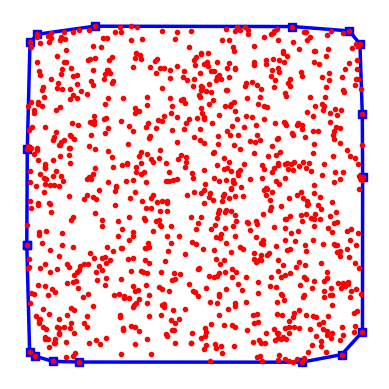

In [22]:
CountMCtrix = []
Set_of_hull = ([])
Count_of_hull = []
for i in set(rand_labels):
    if i==-1: break
    subpoint = set()
    for (j,(x,y)) in enumerate(Point_rand):
        if rand_labels[j]==i:
            subpoint.add(MC.Point(x,y))
    Count_of_hull.append(len(subpoint))
    subhull = MC.convex_hull(subpoint)
    Set_of_hull.append(subhull)
    MC.plot_convex_hull(subhull)
    MC.plot_points(subpoint)
    print("Number of points in hull",i+1,':',len(subpoint))
    print('-------------------------------')
#MC.plot_points(Point_rand)